In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [3]:
crimes = pd.read_csv('crimes_data.csv')
crimes.shape

(802956, 28)

In [4]:
crimes.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           110652
Vict Age               0
Vict Sex          105273
Vict Descent      105281
Premis Cd              9
Premis Desc          475
Weapon Used Cd    523431
Weapon Desc       523431
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          743809
Crm Cd 3          800986
Crm Cd 4          802899
LOCATION               0
Cross Street      674434
LAT                    0
LON                    0
dtype: int64

In [5]:
colums_to_drop = ['DR_NO','Date Rptd','AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Mocodes',
                  'Premis Cd', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc',
                  'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION','Cross Street']
crimes.drop(columns=colums_to_drop, axis=1, inplace=True)
crimes.shape

(802956, 10)

In [6]:
print(crimes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802956 entries, 0 to 802955
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DATE OCC      802956 non-null  object 
 1   TIME OCC      802956 non-null  int64  
 2   AREA NAME     802956 non-null  object 
 3   Crm Cd Desc   802956 non-null  object 
 4   Vict Age      802956 non-null  int64  
 5   Vict Sex      697683 non-null  object 
 6   Vict Descent  697675 non-null  object 
 7   Premis Desc   802481 non-null  object 
 8   LAT           802956 non-null  float64
 9   LON           802956 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 61.3+ MB
None


In [7]:
crimes.describe()

,TIME OCC,Vict Age,LAT,LON
count,802956.000000,802956.000000,802956.000000,802956.000000
mean,1335.403294,29.847791,33.977505,-118.020515
std,654.164612,21.762934,1.809752,6.275190
min,1.000000,-3.000000,0.000000,-118.667600
25%,900.000000,9.000000,34.013600,-118.429600
50%,1415.000000,31.000000,34.058400,-118.321500
75%,1900.000000,45.000000,34.163100,-118.273900
max,2359.000000,120.000000,34.334300,0.000000


In [8]:
crimes.isnull().sum()

DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex        105273
Vict Descent    105281
Premis Desc        475
LAT                  0
LON                  0
dtype: int64

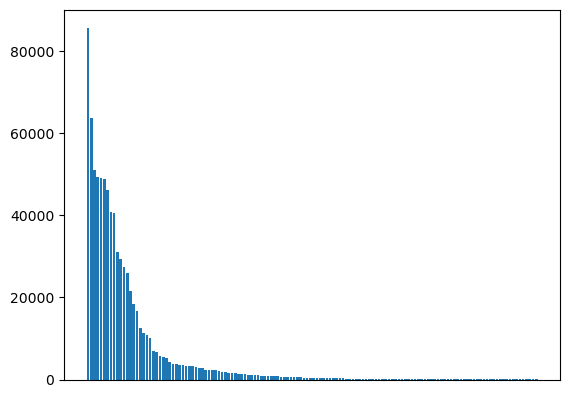

In [9]:
crimes_types = pd.Series(crimes['Crm Cd Desc'])
crimes_counts = crimes_types.value_counts()
plt.bar(crimes_counts.index, crimes_counts.values)
plt.xticks([])
plt.savefig('crimesAll.png',bbox_inches='tight')

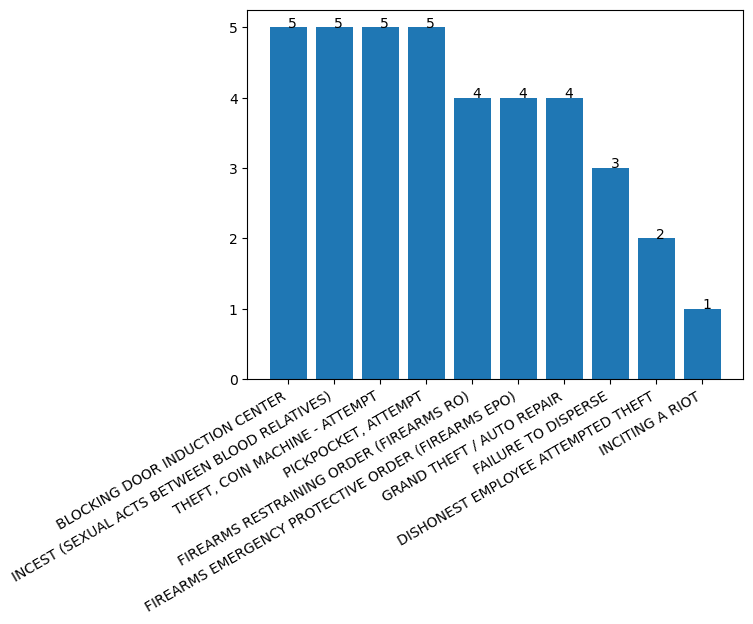

In [12]:
crimes_types_bottom10 = pd.Series(crimes['Crm Cd Desc'])
crimes_counts = crimes_types_bottom10.value_counts()[-10:]

plt.bar(crimes_counts.index, crimes_counts.values)
plt.xticks(rotation=30, ha='right')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(crimes_counts1.index, crimes_counts1.values)
plt.savefig('crimesBottom10.png',bbox_inches='tight')

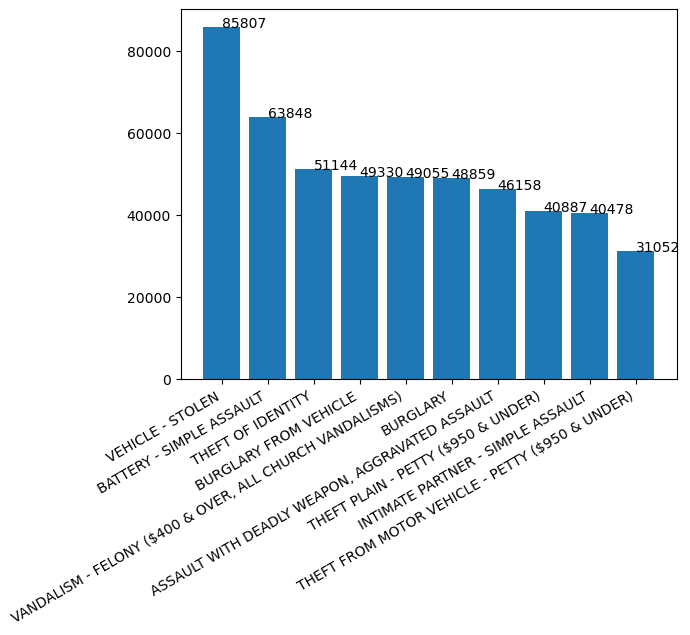

In [14]:
crimes_counts = crimes_types_bottom10.value_counts()[:10]

plt.bar(crimes_counts.index, crimes_counts.values)
plt.xticks(rotation=30, ha='right')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(crimes_counts.index, crimes_counts.values)
plt.savefig('crimesTop10.png',bbox_inches='tight')

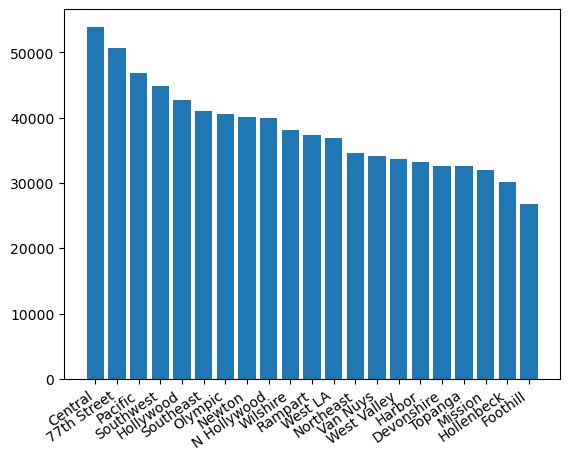

In [15]:
areas_types = pd.Series(crimes['AREA NAME'])
areas_counts = areas_types.value_counts()
plt.bar(areas_counts.index, areas_counts.values)
plt.xticks(rotation=35, ha='right')


plt.savefig('areas.png',bbox_inches='tight')

In [16]:
crimes['Crm Cd Desc'] = crimes['Crm Cd Desc'].replace(['VEHICLE - STOLEN','VEHICLE - ATTEMPT STOLEN', 'BIKE - STOLEN',
                                                      'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)', 'BOAT - STOLEN',
                                                      'BIKE - ATTEMPTED STOLEN'],'Vehicle Theft')
crimes['Crm Cd Desc'] = crimes['Crm Cd Desc'].replace(['BATTERY - SIMPLE ASSAULT','BATTERY POLICE (SIMPLE)','BATTERY ON A FIREFIGHTER', 
                                                       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
                                                       'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER','OTHER ASSAULT',
                                                      'KIDNAPPING', 'KIDNAPPING - GRAND ATTEMPT', 'MANSLAUGHTER, NEGLIGENT',
                                                      'BRANDISH WEAPON', 'DISCHARGE FIREARMS/SHOTS FIRED', 'CRIMINAL HOMICIDE'],'Assault')
crimes['Crm Cd Desc'] = crimes['Crm Cd Desc'].replace(['THEFT PLAIN - PETTY ($950 & UNDER)','THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
                                                      'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
                                                       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
                                                      'SHOPLIFTING - PETTY THEFT ($950 & UNDER)','SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
                                                      'SHOPLIFTING - ATTEMPT','SHOPLIFTING-GRAND THEFT ($950.01 & OVER)','THEFT, PERSON',
                                                      'DOCUMENT FORGERY / STOLEN FELONY','EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
                                                      'DISHONEST EMPLOYEE - GRAND THEFT', 'THEFT OF IDENTITY',
                                                      'BUNCO, GRAND THEFT', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 
                                                      'PICKPOCKET', 'BUNCO, PETTY THEFT', 'THEFT FROM MOTOR VEHICLE - ATTEMPT',
                                                      'THEFT PLAIN - ATTEMPT', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER',
                                                      'CREDIT CARDS, FRAUD USE ($950.01 & OVER)', 'THEFT FROM PERSON - ATTEMPT',
                                                      'PURSE SNATCHING', 'CREDIT CARDS, FRAUD USE ($950 & UNDER)',
                                                      'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01', 
                                                       'DOCUMENT WORTHLESS ($200.01 & OVER)', 'DOCUMENT WORTHLESS ($200 & UNDER)',
                                                      'TILL TAP - PETTY ($950 & UNDER)', 'DISHONEST EMPLOYEE - PETTY THEFT',
                                                      'THEFT, COIN MACHINE - PETTY ($950 & UNDER)', 'PURSE SNATCHING - ATTEMPT',
                                                      'TILL TAP - GRAND THEFT ($950.01 & OVER)', 'PETTY THEFT - AUTO REPAIR',
                                                      'GRAND THEFT / INSURANCE FRAUD', 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
                                                      'THEFT, COIN MACHINE - ATTEMPT', 'PICKPOCKET, ATTEMPT', 'GRAND THEFT / AUTO REPAIR',
                                                      'DISHONEST EMPLOYEE ATTEMPTED THEFT', 'CREDIT CARDS, FRAUD USE ($950 & UNDER'],'Theft')
crimes['Crm Cd Desc'] = crimes['Crm Cd Desc'].replace(['BURGLARY FROM VEHICLE','BURGLARY', 'BURGLARY, ATTEMPTED',
                                                      'BURGLARY FROM VEHICLE, ATTEMPTED', 'TRESPASSING', 'SHOTS FIRED AT INHABITED DWELLING',
                                                      ],'Burglary')
crimes['Crm Cd Desc'] = crimes['Crm Cd Desc'].replace(['VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
                                                       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'THROWING OBJECT AT MOVING VEHICLE',
                                                      'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
                                                      'WEAPONS POSSESSION/BOMBING', 'TELEPHONE PROPERTY - DAMAGE'],'Vandalism')
crimes['Crm Cd Desc'] = crimes['Crm Cd Desc'].replace(['ROBBERY','ATTEMPTED ROBBERY'],'Robbery')
crimes['Crm Cd Desc'] = crimes['Crm Cd Desc'].replace(['INTIMATE PARTNER - SIMPLE ASSAULT','INTIMATE PARTNER - AGGRAVATED ASSAULT',
                                                      'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
                                                        'CHILD ANNOYING (17YRS & UNDER)','CHILD NEGLECT (SEE 300 W.I.C.)',
                                                      'CHILD STEALING', 'CHILD ABANDONMENT', 
                                                       'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
                                                      'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)'],'Domestic Violence')
crimes['Crm Cd Desc'] = crimes['Crm Cd Desc'].replace(['CRIMINAL THREATS - NO WEAPON DISPLAYED','THREATENING PHONE CALLS/LETTERS',
                                                       'STALKING', 'DISTURBING THE PEACE'],'Criminal Threats')
crimes['Crm Cd Desc'] = crimes['Crm Cd Desc'].replace(['RAPE, FORCIBLE','RAPE, ATTEMPTED', 'SEXUAL PENETRATION W/FOREIGN OBJECT',
                                                       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
                                                      'ORAL COPULATION', 'CHILD PORNOGRAPHY', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
                                                      'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS', 'INDECENT EXPOSURE',
                                                      'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
                                                      'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 'BATTERY WITH SEXUAL CONTACT',
                                                      'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 'LEWD CONDUCT',
                                                       'LEWD/LASCIVIOUS ACTS WITH CHILD', 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM'],'Sexual Violence')
crimes['Crm Cd Desc'] = crimes['Crm Cd Desc'].replace(['VIOLATION OF RESTRAINING ORDER','VIOLATION OF COURT ORDER', 
                                                      'OTHER MISCELLANEOUS CRIME', 'FAILURE TO DISPERSE', 'LYNCHING' , 
                                                       'CONSPIRACY', 'EXTORTION', 'FALSE IMPRISONMENT', 'PEEPING TOM',
                                                      'FALSE POLICE REPORT', 'PIMPING', 'PANDERING', 
                                                       'CRUELTY TO ANIMALS', 'ILLEGAL DUMPING', 'DISRUPT SCHOOL',
                                                      'BIGAMY', 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIMAL', 
                                                      'BLOCKING DOOR INDUCTION CENTER', 'BRIBERY', 'FAILURE TO YIELD',
                                                      'DRUNK ROLL', 'INCITING A RIOT', 'CONTEMPT OF COURT', 'ARSON',
                                                      'RESISTING ARREST', 'VIOLATION OF TEMPORARY RESTRAINING ORDER',
                                                      'UNAUTHORIZED COMPUTER ACCESS', 'BOMB SCARE', 'BUNCO, ATTEMPT', 'RECKLESS DRIVING',
                                                      'PROWLER', 'DRIVING WITHOUT OWNER CONSENT (DWOC)', 'COUNTERFEIT', 'CONTRIBUTING', 
                                                       'LYNCHING - ATTEMPTED', 'DRUGS, TO A MINOR', 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)',
                                                      'FIREARMS RESTRAINING ORDER (FIREARMS RO)', 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)'],'Other Crimes')
crimes_types1 = pd.Series(crimes['Crm Cd Desc'])
crimes_types1.value_counts()

Crm Cd Desc
Theft                221784
Assault              134203
Burglary             114822
Vehicle Theft         97026
Vandalism             71817
Domestic Violence     58733
Other Crimes          34054
Robbery               31701
Sexual Violence       19875
Criminal Threats      18941
Name: count, dtype: int64

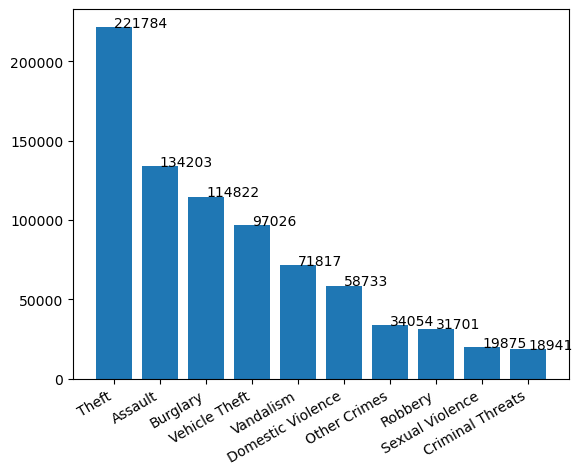

In [17]:
crimes_counts1 = crimes_types1.value_counts()
plt.bar(crimes_counts1.index, crimes_counts1.values)
plt.xticks(rotation=30, ha='right')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(crimes_counts1.index, crimes_counts1.values)
plt.savefig('crimes.png',bbox_inches='tight')

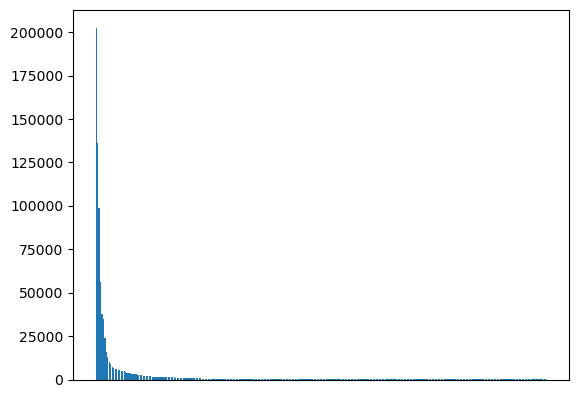

In [18]:
premis_types = pd.Series(crimes['Premis Desc'])

premis_counts = premis_types.value_counts()
plt.bar(premis_counts.index, premis_counts.values)
plt.xticks([])




plt.savefig('premisesAll.png',bbox_inches='tight')

In [19]:
crimes['Premis Desc'] = crimes['Premis Desc'].replace(['.*SCHOOL.*', 'COLLEGE/JUNIOR COLLEGE/UNIVERSITY'],'School', regex = True)
crimes['Premis Desc'] = crimes['Premis Desc'].replace(['.*MTA.*', '.*BUS STOP.*', '.*TRANSPORTATION.*', '.*HARBOR FRWY STATION.*', '.*LA UNION STATION.*', '7TH AND METRO.*', 'MUNICIPAL BUS LINE INCLUDES.*', 'GREYHOUND OR INTERSTATE BUS'],'Public transport facilities', regex = True)
crimes['Premis Desc'] = crimes['Premis Desc'].replace(['.*STORE.*', 'MINI-MART', '.*DIY CENTER.*', 'MARKET', 'SHOPPING MALL (COMMON AREA)', 'SHOPPING MALL.*', 'AUTO REPAIR SHOP', 'TOBACCO SHOP', '.*AUTO DEALERSHIP.*', 'COMPUTER SERVICES.*', 'PAWN SHOP', 'AUTO SALES LOT', 'GUN/SPORTING GOODS'],'Store', regex = True)
crimes['Premis Desc'] = crimes['Premis Desc'].replace(['.*PARKING.*', '.*GARAGE/CARPORT.*', 'VEHICLE STORAGE LOT.*', 'SLIPS.*'],'Parking', regex = True)
crimes['Premis Desc'] = crimes['Premis Desc'].replace(['.*RESTAURANT/FAST FOOD.*','.*BAR/COCKTAIL/NIGHTCLUB.*' ,'.*COFFEE SHOP.*', '.*NIGHT.*', 'DRIVE TH.*'],'Restaurant/Bar', regex = True)
crimes['Premis Desc'] = crimes['Premis Desc'].replace('.*PARK.*','Park', regex = True)
crimes['Premis Desc'] = crimes['Premis Desc'].replace(['HOSPITAL','HEALTH SPA/GYM', 'NURSING/CONVALESCENT/RETIREMENT HOME', 'MEDICAL/DENTAL OFFICES', 'MEDICAL MARIJUANA FACILITIES/BUSINESSES', 'NURSERY/FLOWER SHOP', 'VETERINARIAN.*', 'ABORTION CLINIC.*', 'METHADONE CLINIC', 'HOSPICE', 'DAY CARE.*'],'Medical facility', regex = True)
crimes['Premis Desc'] = crimes['Premis Desc'].replace(['.*MULTI-U.*', 'TRANSIENT ENCAMPMENT', 'TRANSITIONAL HOUSING/HALFWAY HOUSE', 'HOTEL', 'MOTEL', 'GROUP HOME', 'APARTMENT/CONDO COMMON LAUNDRY ROOM', 'OTHER RESIDENCE', 'MISSIONS/SHELTERS', 'CONDOMINIUM/TOWNHOUSE', 'PROJECT/TENEMENT/PUBLIC HOUSING', 'FRAT HOUSE/SORORITY/DORMITORY', 'SHORT-TERM VACATION RENTAL', 'FOSTER HOME BOYS OR GIRLS.*'],'Residential building', regex = True)
crimes['Premis Desc'] = crimes['Premis Desc'].replace(['SINGLE FAMILY DWELLING', 'SINGLE RESIDENC.*', 'MOBILE HOME/TRAILERS/CONSTRUCTION.*'],'Residential building', regex = True)
crimes['Premis Desc'] = crimes['Premis Desc'].replace(['STREET','ALLEY', 'SIDEWALK', 'FREEWAY'],'Street', regex = True)
crimes['Premis Desc'] = crimes['Premis Desc'].replace(['STAPLES CENTER.*','OTHER BUSINESS', 'SEWAGE FACILITY/PIPE', 'TRAM/StreetCAR.*', 'DEPT OF DEFENSE FACILITY', 'CHEMICAL STORAGE/MANUFACTURING PLANT', 'HOCKEY RINK/ICE HOCKEY', 'SKATING.*', 'GAS STATION', 'BANK', 'PUBLIC STORAGE', 'AUTOMATED TELLER MACHINE.*', '.*DROP BOX/MONEY.*', 'ESCALATOR.*', 'GARMENT MANUFACTURER', 'OIL REFINERY', 'TOOL.*', 'TUNNEL', 'TV/RADIO/APPLIANCE', 'MOSQUE.*', 'MORTUARY', 'OFFICE BUILDING/OFFICE', 'CYBERSPACE', 'WAREHOUSE', 'POLICE FACILITY', 'CHURCH/CHAPEL.*', 'LAUNDROMAT', 'GOVERNMENT FACILITY.*', 'STORAGE SHED', 'ABANDONED BUILDING ABANDONED HOUSE', 'BEAUTY/BARBER SHOP', 'WEBSITE', 'LIBRARY', 'BALCONY.*', 'DODGER STADIUM', 'THE BEVERLY CENTER', 'HARDWARE/BUILDING SUPPLY', 'THEATRE/MOVIE', 'NAIL SALON', 'THE BEVERLY CONNECTION', 'STUDIO.*', 'POST OFFICE', 'CHECK CASHING.*', 'STUDIO (FILM/PHOTOGRAPHIC/MUSIC)', 'FIRE STATION', 'DETENTION/JAIL FACILITY', 'SYNAGOGUE/TEMPLE', 'COLISEUM', 'HIGH-RISE BUILDING', 'CONVENTION CENTER', 'MASSAGE PARLOR', 'MUSEUM', 'PUBLIC RESTROOM.*', 'STAIRWELL.*', 'ELEVATOR', 'SPORTS ARENA', 'MANUFACTURING COMPANY', 'ENTERTAINMENT.*', 'SWAP MEET', 'VALET', 'CREDIT UNION', 'FACTORY', 'BOWLING Street.*', 'VISION CARE FACILITY.*', 'FINANCE COMPANY', 'TATTOO PARLOR.*', 'SAVINGS & LOAN', 'ARCADE,GAME ROOM.*', 'ENERGY PLANT.*'],'Other inside', regex = True)
crimes['Premis Desc'] = crimes['Premis Desc'].replace(['MUSCLE BEACH','DRIVEWAY', 'HANDBALL COURTS', 'OTHER PREMISE', 'YARD.*', 'PORCH, RESIDENTIAL', 'OTHER/OUTSIDE', 'RETIRED.*', 'MASS GATHERING LOCATION', 'ABATEMENT LOCATION', 'PAY PHONE', 'PEDESTRIAN OVERCROSSING', 'DAM/RESERVOIR', 'CULTURAL SIGNIFICANCE/MONUMENT', 'WATER FACILITY', 'TRASH CAN/TRASH DUMPSTER', 'BASKETBALL COURTS', 'CONSTRUCTION SITE', 'BEACH', 'MAIL BOX', 'THE GROVE', 'PATIO.*', 'CAR WASH', 'VACANT LOT', 'TOW.*', 'RECYCLING CENTER', 'SPORTS VENUE, OTHER', 'GOLF COURSE.*', 'TRAIN TRACKS', 'CLEANER/Other inside', 'UNDERPASS.*', 'RIVER BED.*', 'EQUIPMENT RENTAL', 'CEMETARY.*', 'POOL-PUBLIC.*', 'OTHER PLACE OF WORSHIP', 'TELECOMMUNICATION FACILITY.*'],'Other outside', regex = True)
crimes['Premis Desc'] = crimes['Premis Desc'].replace(['VEHICLE, PASSENGER.*','OTHER INTERSTATE, CHARTER BUS','TRUCK, COMMERICAL', 'AMTRAK TRAIN', 'AIRCRAFT', 'CATERING.*', 'DELIVERY SERVICE.*', 'TAXI', 'METROLINK TRAIN', 'BUS-CHARTER.*', 'OTHER RR TRAIN.*'],'Vehicle', regex = True)

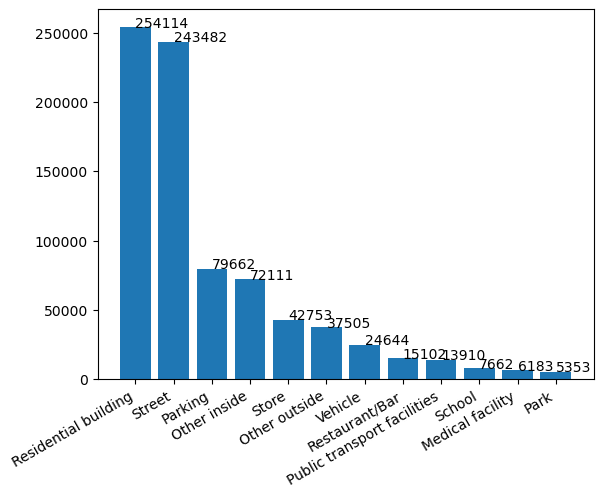

In [20]:
premis_types1 = pd.Series(crimes['Premis Desc'])
premis_types1.value_counts()

premis_counts1 = premis_types1.value_counts()
plt.bar(premis_counts1.index, premis_counts1.values)
plt.xticks(rotation=30, ha='right')
addlabels(premis_counts1.index, premis_counts1.values)
plt.savefig('premises.png', bbox_inches='tight')

In [21]:
crimes.isnull().sum()

DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex        105273
Vict Descent    105281
Premis Desc        475
LAT                  0
LON                  0
dtype: int64

In [22]:
crimes['Premis Desc'] = crimes['Premis Desc'].fillna('Residential building')

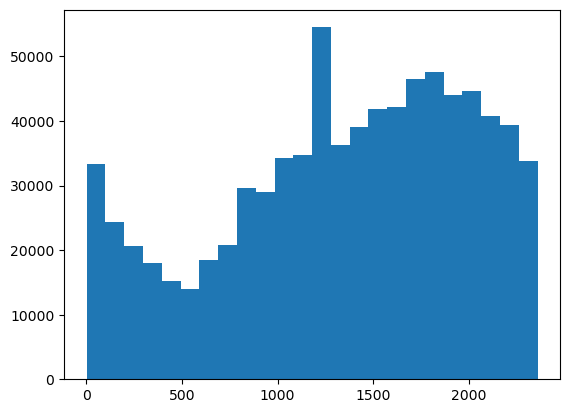

In [24]:
plt.hist(crimes['TIME OCC'], bins=24)
plt.savefig('time.png', bbox_inches='tight')

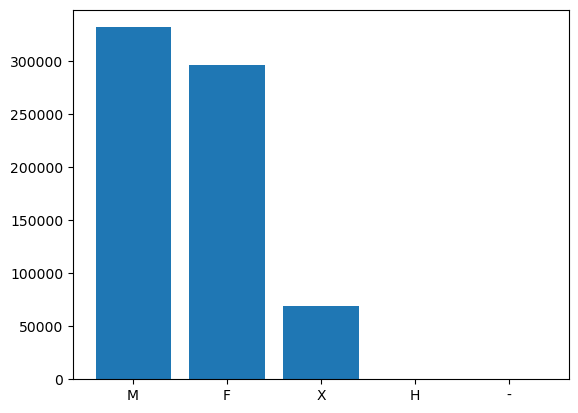

In [26]:
genders_hist = pd.Series(crimes['Vict Sex'])
genders_hist_counts = genders_hist.value_counts()

#plt.hist(gender_test['Vict Sex'], bins=10)
plt.bar(genders_hist_counts.index,genders_hist_counts.values)
plt.savefig('gender.png', bbox_inches='tight')

<BarContainer object of 2 artists>

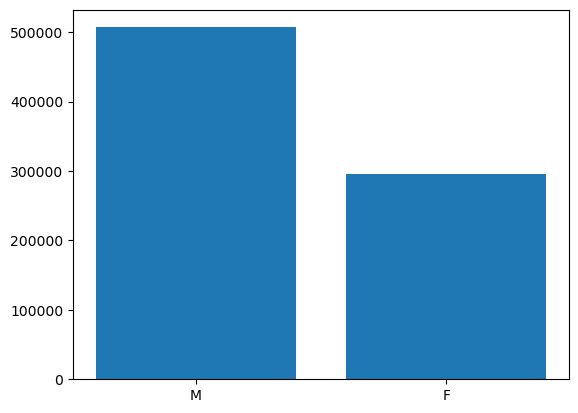

In [28]:
crimes['Vict Sex'] = crimes['Vict Sex'].replace(['H','X', '-'], 'M')
crimes['Vict Sex'] = crimes['Vict Sex'].fillna('M')

genders_hist = pd.Series(crimes['Vict Sex'])
genders_hist_counts= genders_hist.value_counts()

plt.bar(genders_hist_counts.index,genders_hist_counts.values)

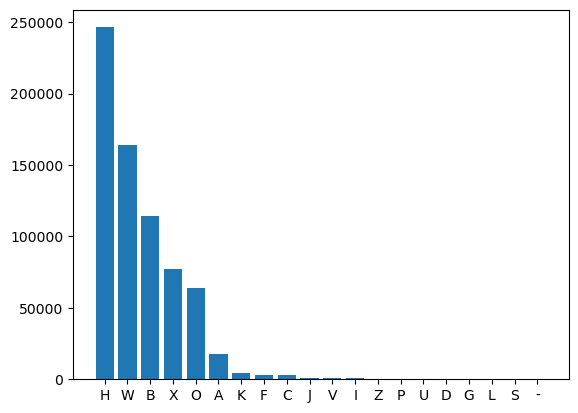

In [30]:
victime_descent_types = pd.Series(crimes['Vict Descent'])
victime_descent_count = victime_descent_types.value_counts()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

plt.bar(victime_descent_count.index, victime_descent_count.values)
plt.savefig('descent.png', bbox_inches='tight')

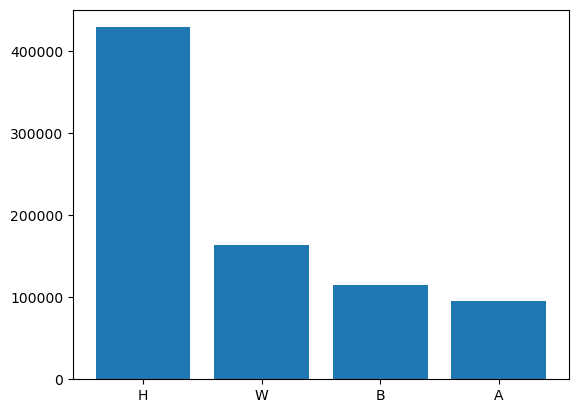

In [31]:
crimes['Vict Descent'] = crimes['Vict Descent'].replace(['O','S', 'L', 'G', 'D', 'U', 'P', 'Z', 'I', 'V', 'J', 'C', 'F', 'K', ],'A',)
crimes['Vict Descent'] = crimes['Vict Descent'].replace(['-','X'], 'H')
crimes['Vict Descent'] = crimes['Vict Descent'].fillna('H')

victime_descent_types1 = pd.Series(crimes['Vict Descent'])
to_bar = victime_descent_types1.value_counts()

plt.bar(to_bar.index,to_bar.values)
plt.savefig('descent2.png', bbox_inches='tight')

In [32]:
crimes.isnull().sum()

DATE OCC        0
TIME OCC        0
AREA NAME       0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Desc     0
LAT             0
LON             0
dtype: int64

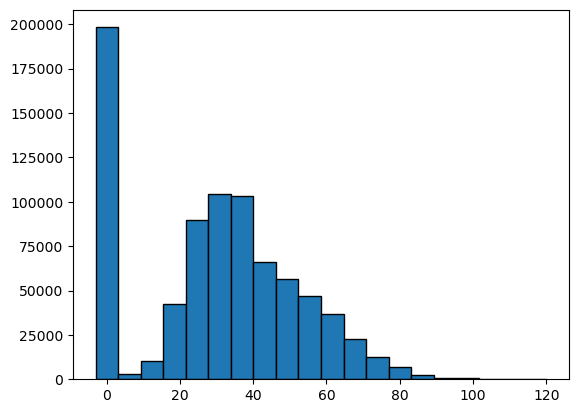

In [33]:
plt.hist(crimes['Vict Age'], bins=20, edgecolor = "black")
plt.savefig('age.png', bbox_inches='tight')

In [34]:
O_Age = crimes[crimes['Vict Age'] != 0]
O_Age['Vict Age'].mean()
crimes['Vict Age'] = crimes['Vict Age'].replace([-3,-2,-1, 0], O_Age['Vict Age'].mean())

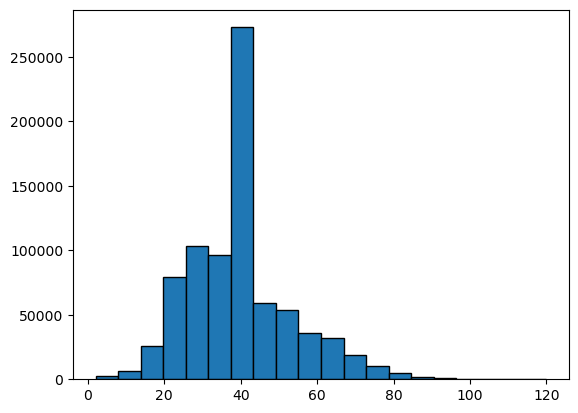

In [35]:
plt.hist(crimes['Vict Age'], bins=20, edgecolor = "black")
plt.savefig('age2.png', bbox_inches='tight')

In [37]:
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])
crimes['Day_Occ'] = crimes['DATE OCC'].dt.day
crimes['Month_Occ'] = crimes['DATE OCC'].dt.month
crimes.drop(columns='DATE OCC', axis=1, inplace=True)

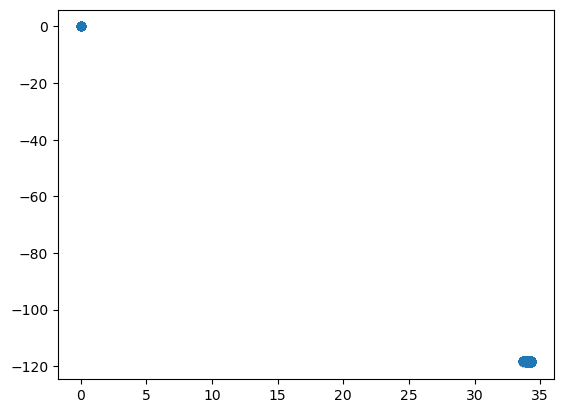

<Figure size 640x480 with 0 Axes>

In [38]:
plt.scatter(crimes['LAT'],crimes['LON'],alpha=0.01)

plt.show()
plt.savefig('geoWith0.png', bbox_inches='tight')

In [40]:
crimes = crimes[crimes['LAT']>0]
crimes = crimes[crimes['LON']<0]

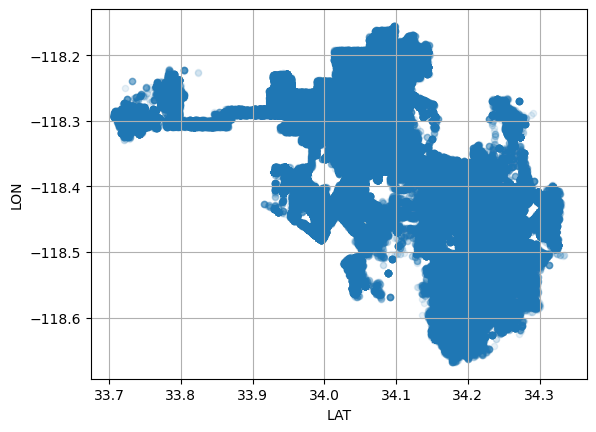

In [41]:
geo = crimes.plot(kind="scatter", x="LAT", y="LON", grid=True, alpha=0.1).get_figure()

geo.savefig('geo.png', bbox_inches='tight')

C:\Users\shed\AppData\Local\Temp\ipykernel_11000\3258527637.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


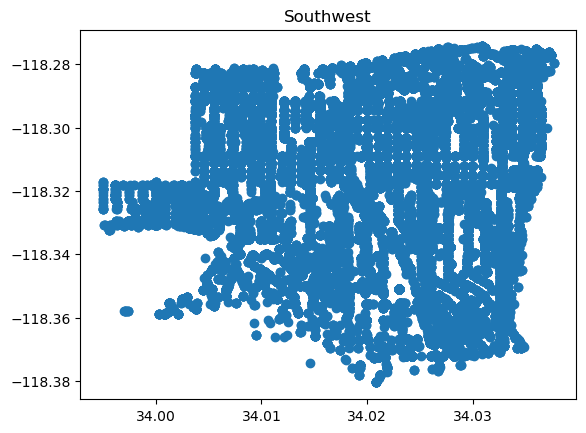

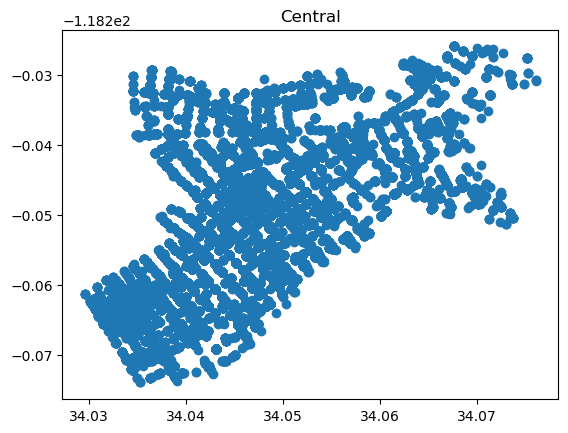

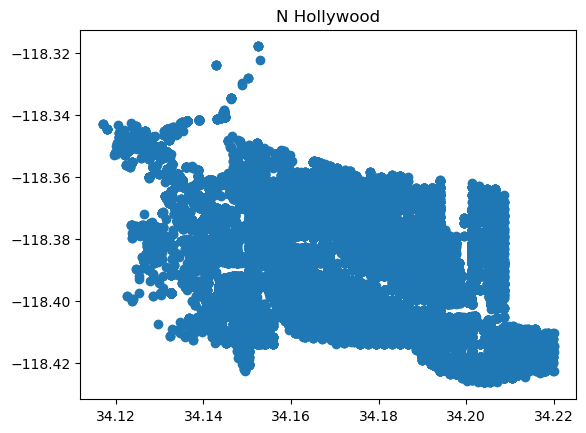

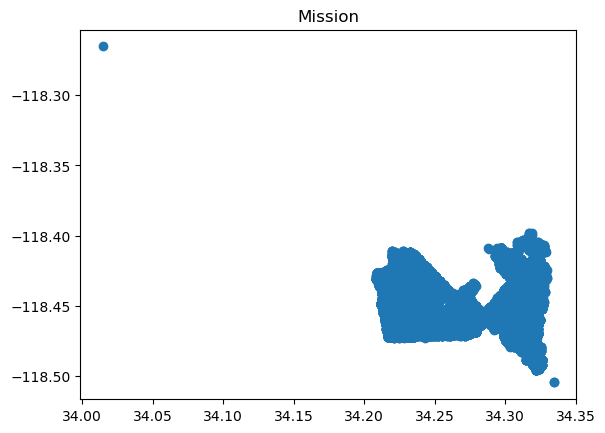

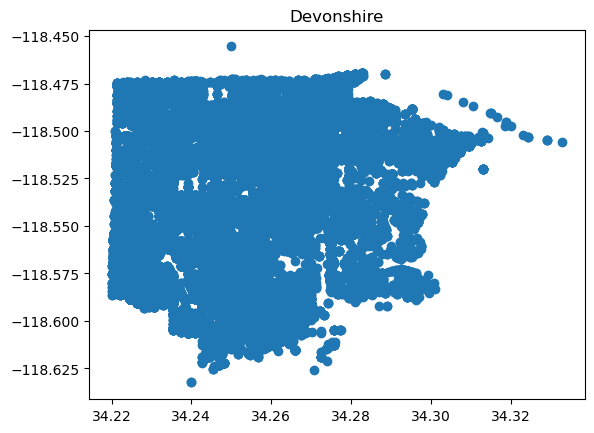

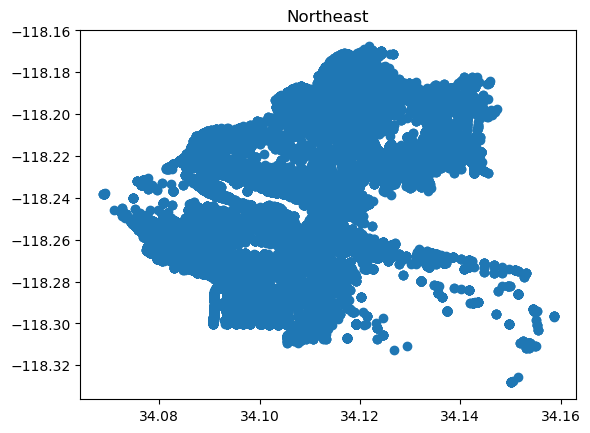

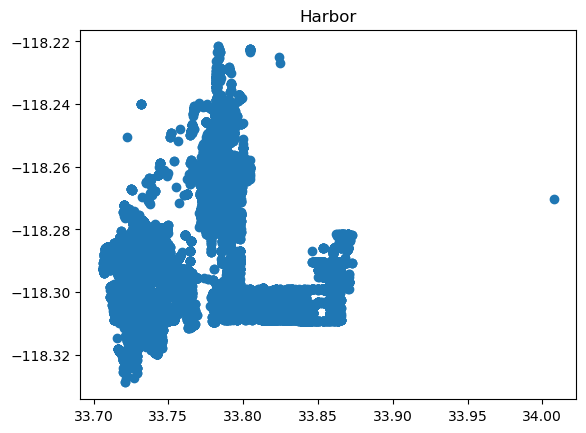

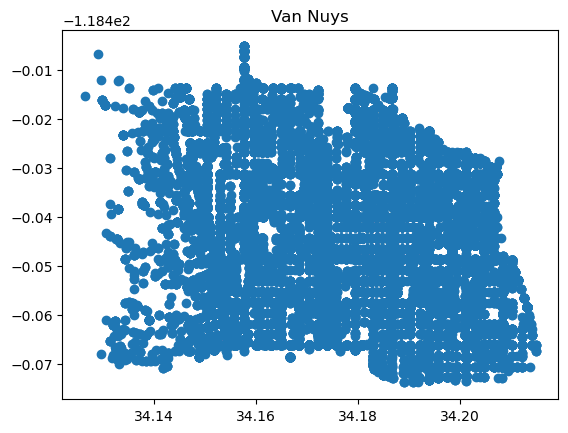

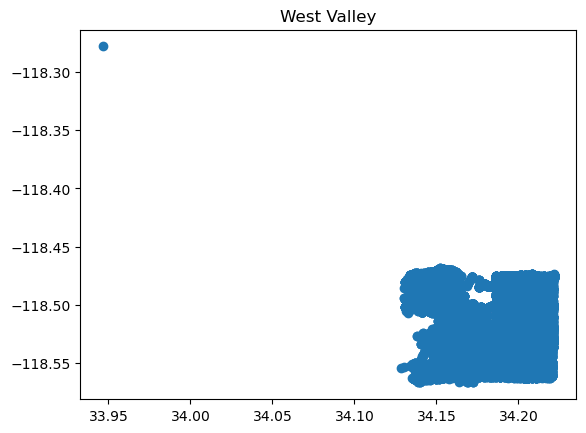

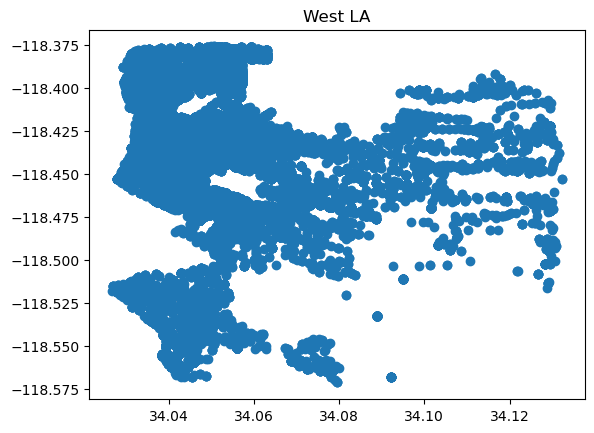

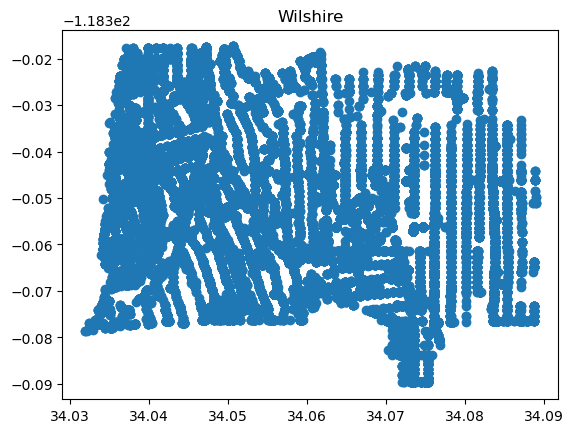

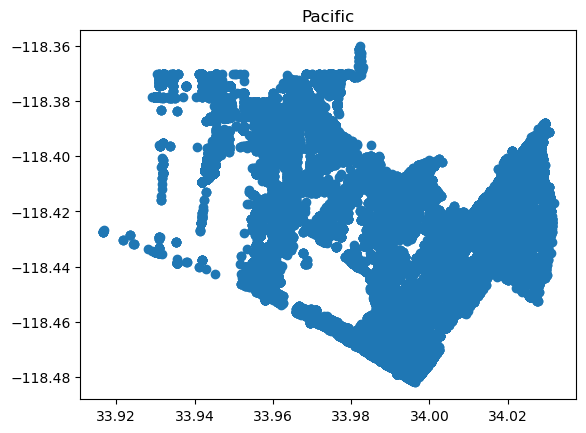

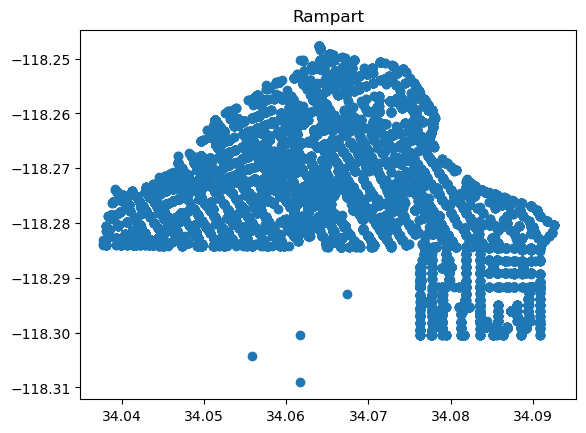

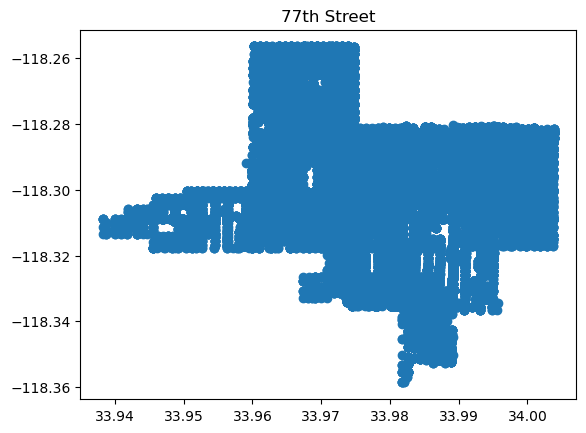

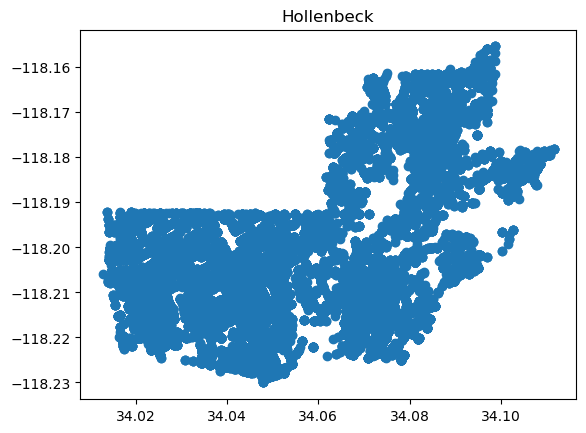

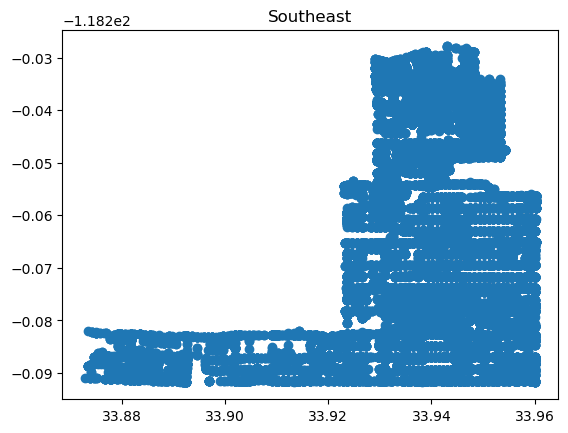

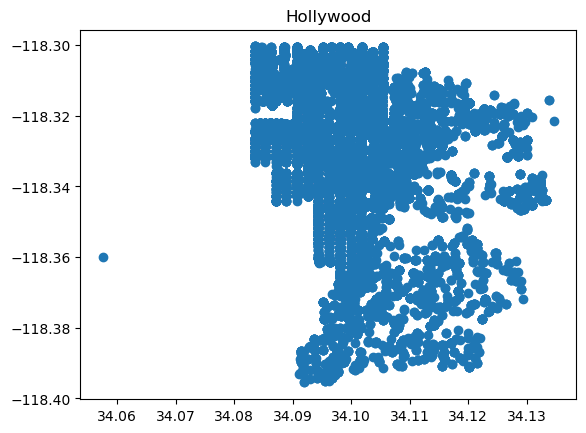

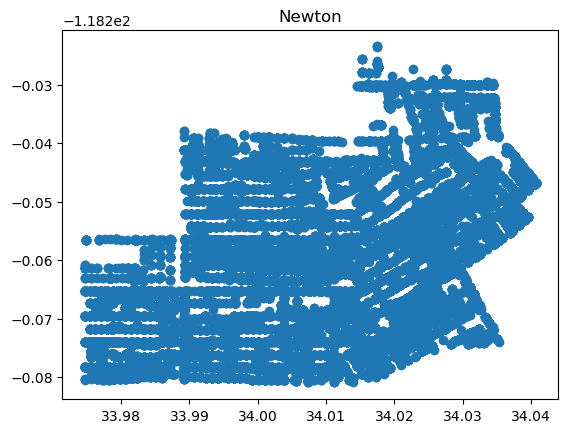

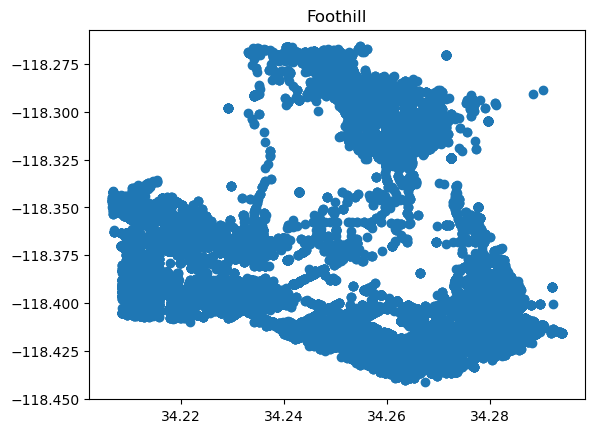

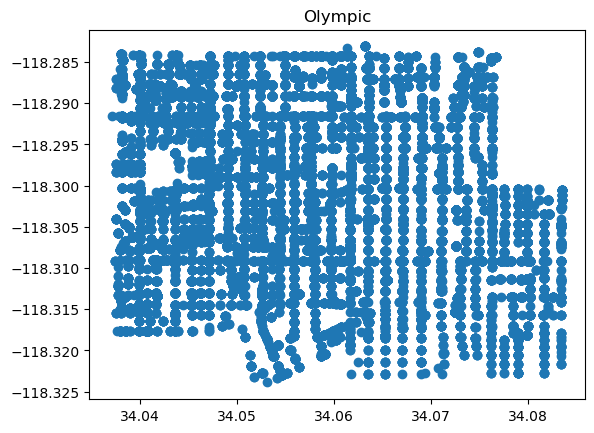

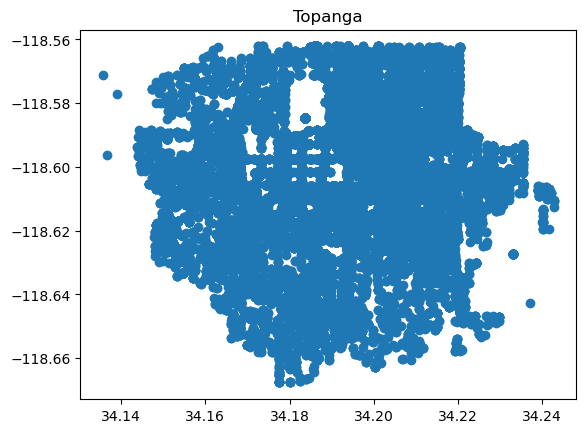

In [42]:
areas_list = ['Southwest', 'Central', 'N Hollywood', 'Mission', 'Devonshire',
       'Northeast', 'Harbor', 'Van Nuys', 'West Valley', 'West LA',
       'Wilshire', 'Pacific', 'Rampart', '77th Street', 'Hollenbeck',
       'Southeast', 'Hollywood', 'Newton', 'Foothill', 'Olympic',
       'Topanga']
min_max_geo_dict ={}
for element in areas_list:
    if element not in min_max_geo_dict.keys():
      tmp = crimes[crimes['AREA NAME'] == element]
      min_max_geo_dict[element] =  [tmp['LAT'].max(), tmp['LAT'].min(), tmp['LON'].max(), tmp['LON'].min()]
      fig, ax = plt.subplots()
      ax.scatter(tmp['LAT'], tmp['LON'])
      ax.set_title(element)
      plt.savefig(f"{element}.png", bbox_inches='tight')